In [93]:
#importing relevant libraries
import pandas as pd
import os
from matplotlib import pyplot as plt
import calendar
from itertools import combinations
from collections import Counter

In [17]:
#Merging multiple CSV files into one
file_path = 'D:\Python\Sales Analysis'
file_list = os.listdir(file_path) #creates a list of all the files in the file_path.
#When you use `os.listdir()`, it returns only the filenames without the directory path
df_sales_merged = pd.concat([pd.read_csv(os.path.join(file_path,file)) for file in file_list], ignore_index=True)
df_sales_merged

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Cleaning the data

In [4]:
#Finding null values in data
df_sales_merged[df_sales_merged.isna().any(axis=1)]
#dropping the rows with null value
df_sales_merged = df_sales_merged.dropna(how= 'any', axis=0)
df_sales_merged

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [19]:
#Adding a month column in the dataframe
df_sales_merged['Order Month'] =  pd.to_datetime(df_sales_merged['Order Date'].astype(str), errors='coerce').dt.month """ Convert Order Date to string as 
data type of order date is month in df, errors = coerce will replace unknown format value of date with Nan"""
#df_sales_merged[df_sales_merged.isna().any(axis=1)]
df_sales_merged = df_sales_merged.dropna(how= 'any', axis=0)
df_sales_merged['Order Month'].astype(int)
df_sales_merged

C:\Users\abhin\AppData\Local\Temp\ipykernel_8052\2801708015.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sales_merged['Order Month'] =  pd.to_datetime(df_sales_merged['Order Date'].astype(str), errors='coerce').dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9.0
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9.0
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9.0
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9.0


In [33]:
#Adding Sales Column
df_sales_merged['Total Sales'] = df_sales_merged['Quantity Ordered'].astype(float)*df_sales_merged['Price Each'].astype(float)
df_sales_merged

C:\Users\abhin\AppData\Local\Temp\ipykernel_8052\789345791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_merged['Total Sales'] = df_sales_merged['Quantity Ordered'].astype(float)*df_sales_merged['Price Each'].astype(float)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9.0,8.97
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9.0,700.00
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9.0,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9.0,379.99


#### What was the best month for Sales? How much was earned that month?

In [41]:
y_sales = df_sales_merged.groupby('Order Month')['Total Sales'].sum()

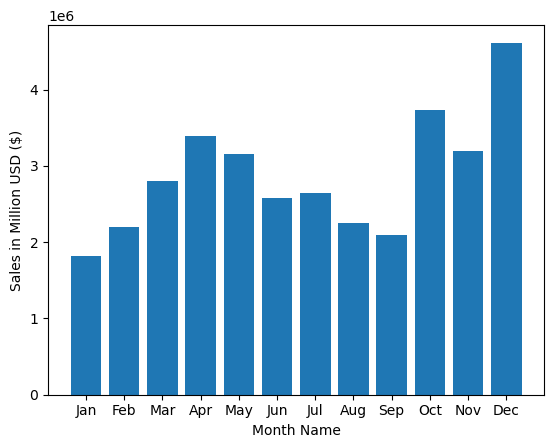

In [50]:
#Visualize the data

months = range (1,13)
plt.bar(months,y_sales)
months_label = [calendar.month_abbr[i] for i in months] #get month name from number using calendar module
plt.xticks(months,months_label) #map the list of month name to each value of months
plt.xlabel('Month Name')
plt.ylabel('Sales in Million USD ($)')
plt.show()

#### What city sold the most products?

In [65]:
#Creating a city column
df_sales_merged['Purchase City'] = df_sales_merged['Purchase Address'].astype(str).str.split(',').str[1]
#Creating a state column
df_sales_merged['Purchase State'] = df_sales_merged['Purchase Address'].apply(lambda x: x.split(',')[2])
df_sales_merged['Purchase State'] = df_sales_merged['Purchase State'].apply(lambda x: x.split(' ')[1])
 


C:\Users\abhin\AppData\Local\Temp\ipykernel_8052\3395966384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_merged['Purchase City'] = df_sales_merged['Purchase Address'].astype(str).str.split(',').str[1]
C:\Users\abhin\AppData\Local\Temp\ipykernel_8052\3395966384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_merged['Purchase State'] = df_sales_merged['Purchase Address'].apply(lambda x: x.split(',')[2])
C:\Users\abhin\AppData\Local\Temp\ipykernel_8052\3395966384.py:5: SettingWithC

In [78]:
result = df_sales_merged.groupby('Purchase City (State)')['Total Sales'].sum()
result

Purchase City (State)
Atlanta(GA)          2795498.58
Austin(TX)           1819581.75
Boston(MA)           3661642.01
Dallas(TX)           2767975.40
Los Angeles(CA)      5452570.80
New York City(NY)    4664317.43
Portland(ME)          449758.27
Portland(OR)         1870732.34
San Francisco(CA)    8262203.91
Seattle(WA)          2747755.48
Name: Total Sales, dtype: float64

C:\Users\abhin\AppData\Local\Temp\ipykernel_8052\2991568658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_merged['Purchase City (State)'] = df_sales_merged['Purchase City'].astype(str) + '('+ df_sales_merged['Purchase State'].astype(str) +')'


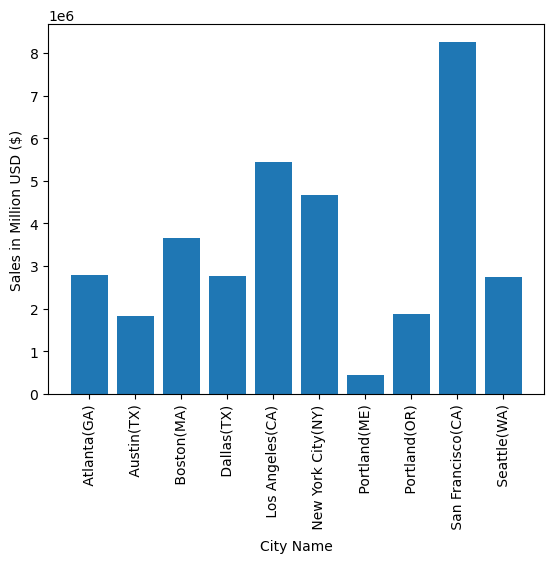

In [81]:
#Couldn't get purchase city and purchase state as in x-axis so had to make a new column with both. There are two Portland in different states.
df_sales_merged['Purchase City (State)'] = df_sales_merged['Purchase City'].astype(str) + '('+ df_sales_merged['Purchase State'].astype(str) +')'
#x_axis = df_sales_merged['Purchase City (State)'].unique() you will get cities in a different order visualization will have wrong result
x_axis = [city_state for city_state, df in df_sales_merged.groupby('Purchase City (State)')] ## Fixed list comprehension syntax - use proper variable names city_state 
plt.bar(x_axis,result)
plt.xticks(x_axis, rotation='vertical') 
plt.xlabel('City Name')
plt.ylabel('Sales in Million USD ($)')
plt.show()

#### What time should we display advertisements to maximize the likelihood of purchases?


In [82]:
#Getting a new column of order time
df_sales_merged['Order Time'] =  pd.to_datetime(df_sales_merged['Order Date'].astype(str), errors='coerce').dt.hour

C:\Users\abhin\AppData\Local\Temp\ipykernel_8052\1965598574.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sales_merged['Order Time'] =  pd.to_datetime(df_sales_merged['Order Date'].astype(str), errors='coerce').dt.hour
C:\Users\abhin\AppData\Local\Temp\ipykernel_8052\1965598574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_merged['Order Time'] =  pd.to_datetime(df_sales_merged['Order Date'].astype(str), errors='coerce').dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Sales,Purchase City,Purchase State,Purchase City (State),Order Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,TX,Dallas(TX),8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,MA,Boston(MA),22
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,CA,Los Angeles(CA),14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,CA,Los Angeles(CA),14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,CA,Los Angeles(CA),9
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9.0,8.97,Los Angeles,CA,Los Angeles(CA),20
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9.0,700.00,San Francisco,CA,San Francisco(CA),16
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9.0,700.00,San Francisco,CA,San Francisco(CA),7
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9.0,379.99,San Francisco,CA,San Francisco(CA),17


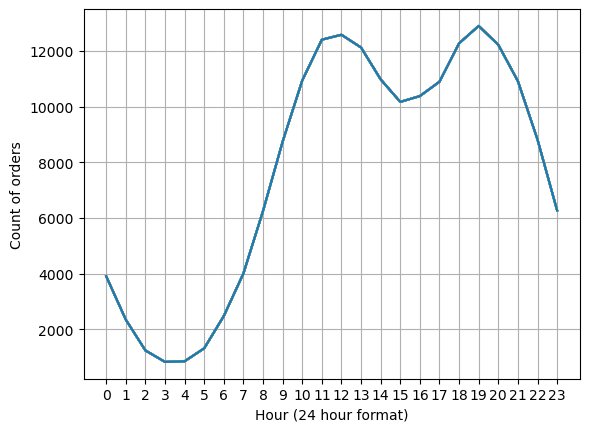

In [108]:
#Plotting a line chart to know orders placed by time
time = [time for time, df in df_sales_merged.groupby('Order Time')]
plt.plot(time, df_sales_merged.groupby('Order Time').count())
plt.grid()
plt.xticks(time)
plt.xlabel('Hour (24 hour format)')
plt.ylabel ('Count of orders')
plt.show()

#### What products are most often sold together?

In [88]:
#Initial approach that I thought was comparing each record and returning name of the products if address and order time equates for 2 records
#There are about 200000 rows, complexity would be 200000*200000 so, need a better solution
#Better approach is finding all the duplicates of orderId and seeing with products are sold together

df_duplicate_order_id = df_sales_merged[df_sales_merged.duplicated(subset=['Order ID'],keep=False)] #keep = false will keep all the duplicate values
df_duplicate_order_id

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Sales,Purchase City,Purchase State,Purchase City (State),Order Time
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,CA,Los Angeles(CA),14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,CA,Los Angeles(CA),14
18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,CA,Los Angeles(CA),19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4.0,11.95,Los Angeles,CA,Los Angeles(CA),19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4.0,99.99,Boston,MA,Boston(MA),11
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9.0,3.84,Atlanta,GA,Atlanta(GA),20
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9.0,11.99,Atlanta,GA,Atlanta(GA),0
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9.0,5.98,Atlanta,GA,Atlanta(GA),0
186841,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9.0,600.00,San Francisco,CA,San Francisco(CA),13


In [89]:
#Merging multiple products of grouped order id into one column
df_duplicate_order_id['Merged Products'] = df_duplicate_order_id.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_duplicate_order_id.head(100)

C:\Users\abhin\AppData\Local\Temp\ipykernel_8052\2829787791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicate_order_id['Merged Products'] = df_duplicate_order_id.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Sales,Purchase City,Purchase State,Purchase City (State),Order Time,Merged Products
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,CA,Los Angeles(CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,CA,Los Angeles(CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,CA,Los Angeles(CA),19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4.0,11.95,Los Angeles,CA,Los Angeles(CA),19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4.0,99.99,Boston,MA,Boston(MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,177582,Bose SoundSport Headphones,1,99.99,04/16/19 17:19,"707 9th St, Dallas, TX 75001",4.0,99.99,Dallas,TX,Dallas(TX),17,"Bose SoundSport Headphones,Wired Headphones"
1078,177582,Wired Headphones,1,11.99,04/16/19 17:19,"707 9th St, Dallas, TX 75001",4.0,11.99,Dallas,TX,Dallas(TX),17,"Bose SoundSport Headphones,Wired Headphones"
1088,177592,iPhone,1,700,04/19/19 11:10,"448 Maple St, San Francisco, CA 94016",4.0,700.00,San Francisco,CA,San Francisco(CA),11,"iPhone,Lightning Charging Cable"
1089,177592,Lightning Charging Cable,2,14.95,04/19/19 11:10,"448 Maple St, San Francisco, CA 94016",4.0,29.90,San Francisco,CA,San Francisco(CA),11,"iPhone,Lightning Charging Cable"


In [92]:
#Dropping rows with duplicate order id as we now have all the products sold in a particular order id in merged products column
df_duplicate_order_id = df_duplicate_order_id[['Order ID', 'Merged Products']].drop_duplicates()
df_duplicate_order_id.head()

,Order ID,Merged Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [94]:
#Counting the number of unique merged products
count = Counter()
for row in df_duplicate_order_id['Merged Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
#Printing the most common products (2) ordered together
for key, value in count.most_common(10):
    print(key,value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

In [103]:
df_sales_merged['Quantity Ordered'] = df_sales_merged['Quantity Ordered'].astype(int)
df_products_count = df_sales_merged[['Quantity Ordered','Product']].groupby('Product').sum()
df_products_count



C:\Users\abhin\AppData\Local\Temp\ipykernel_8052\2686973575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_merged['Quantity Ordered'] = df_sales_merged['Quantity Ordered'].astype(int)


,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


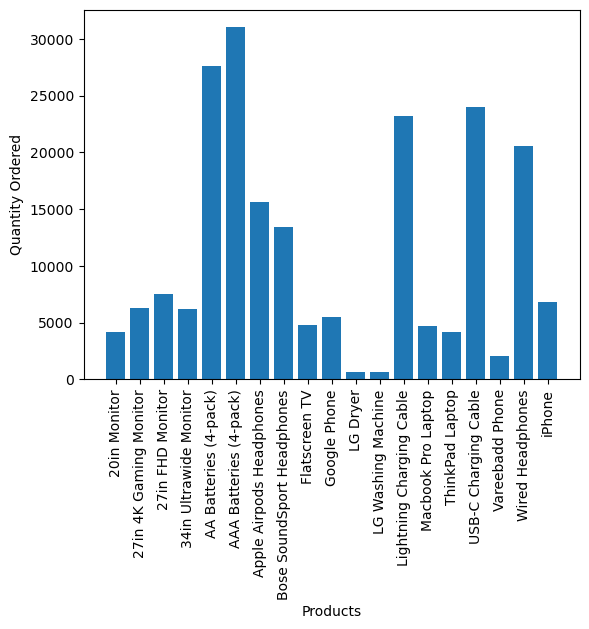

In [106]:
#Graphing the data
products = df_products_count.index
plt.bar(products, df_products_count['Quantity Ordered'])
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_8052\2773555015.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_merged['Price Each'] = pd.to_numeric(df_sales_merged['Price Each'], errors='coerce')
C:\Users\abhin\AppData\Local\Temp\ipykernel_8052\2773555015.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\abhin\AppData\Local\Temp\ipykernel_8052\2773555015.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


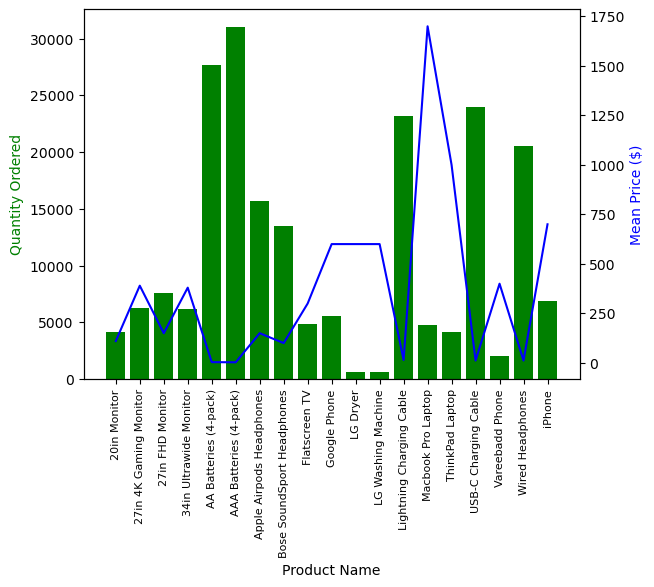

In [129]:
#Overlaying the graph with mean price
"""df_sales_merged['Price Each'] = pd.to_numeric(df_sales_merged['Price Each'], errors= 'coerce')
mean_price = df_sales_merged.groupby('Product').mean(numeric_only=True)['Price Each']
print(mean_price)"""

df_sales_merged['Price Each'] = pd.to_numeric(df_sales_merged['Price Each'], errors='coerce')
mean_price = df_sales_merged.groupby('Product').mean(numeric_only=True)['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, df_products_count['Quantity Ordered'], color='g')
ax2.plot(products, mean_price, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Mean Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()
